**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


In [7]:
txt_region = "fcc_astarr_macs_input_union"
txt_assay  = "CRISPRi_FlowFISH_K562_Riley_JinWoo" 
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region, txt_assay, "overlap_score")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_HCRFF_K562.hg38.ZScore.filtered.unstranded.bed.gz 
CRISPRi_HCRFF_K562.hg38.ZScore.unstranded.bed.gz 
summary 


In [8]:
txt_region = "fcc_astarr_macs_input_union"
txt_assay  = "CRISPRi_FlowFISH_K562_Riley_JinWoo" 
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region, txt_assay, "overlap_score", "summary")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

result.coverage.score.filtered.tsv 
result.coverage.score.tsv 
result.coverage.zscore.tsv 


In [4]:
#txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
#vec = dir(txt_fdiry)
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_REGION = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


```
vec_txt_assay = c(
    "CRISPRi_FlowFISH_K562_Riley_JinWoo",
    "CRISPRi_Growth_K562_Gersbach_JinWoo",
    "MPRA_Lenti_K562_Nadav_Vikram"
)
```

## Import data

In [12]:
### init
txt_region = "fcc_astarr_macs_input_union"
txt_assay  = "CRISPRi_FlowFISH_K562_Riley_JinWoo" 

### set directory and import assay description
txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "coverage", "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat_cname_assay = read_tsv(txt_fpath, show_col_types = FALSE)

### set directory and import region description
txt_folder = "region_for_analysis"
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname  = "description.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat_cname_region = read_tsv(txt_fpath, show_col_types = FALSE)

### set column names/types for overlap score
vec_txt_cname = c(
    paste(dat_cname_region$Name, "A", sep = "_"), 
    paste(dat_cname_assay$Name,  "B", sep = "_"), 
    "Overlap"
)

### set file directory
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region, txt_assay, "overlap_score")
txt_fname  = "CRISPRi_HCRFF_K562.hg38.ZScore.filtered.unstranded.bed.gz"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_score_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 176457     12


Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Chrom_B,ChromStart_B,ChromEnd_B,Name_B,Score_B,Strand_B,Target_B,Overlap
chr11,4092104,4092566,chr11:4092104-4092566,chr11,4092122,4092123,id-145,-1.101030,.,HBE1,1
chr11,4092104,4092566,chr11:4092104-4092566,chr11,4092122,4092123,id-145,-0.015199,.,HBG1,1
chr11,4092104,4092566,chr11:4092104-4092566,chr11,4092122,4092123,id-145,0.304337,.,HBG2,1


## Arrange table

In [14]:
dat = dat_region_score_import
dat = dat %>% 
    dplyr::mutate(
        Chrom      = Chrom_A,
        ChromStart = ChromStart_A,
        ChromEnd   = ChromEnd_A,
        Region     = fun_gen_region(Chrom_A, ChromStart_A, ChromEnd_A),
        Guide      = fun_gen_region(Chrom_B, ChromStart_B, ChromEnd_B),
        Score      = Score_B,
        Target     = Target_B
    ) %>%
    dplyr::select(Chrom, ChromStart, ChromEnd, Region, Guide, Score, Target) %>%
    dplyr::distinct()

###
dat_region_score_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 176457      7


Chrom,ChromStart,ChromEnd,Region,Guide,Score,Target
chr11,4092104,4092566,chr11:4092104-4092566,chr11:4092122-4092123,-1.101030,HBE1
chr11,4092104,4092566,chr11:4092104-4092566,chr11:4092122-4092123,-0.015199,HBG1
chr11,4092104,4092566,chr11:4092104-4092566,chr11:4092122-4092123,0.304337,HBG2


## Summarize scores

In [17]:
###
#dat = dat_peak_score_arrange
dat = dat_region_score_arrange
dat = dat %>% dplyr::mutate(Sign  = ifelse(Score > 0, "pos", "neg"))

###
dat_summary_total = dat %>%
    #dplyr::group_by(Peak, Gene) %>%
    dplyr::group_by(Region, Target) %>%
    dplyr::summarise(
        Mean    = mean(Score),
        Median  = median(Score),
        Max     = max(Score),
        Min     = min(Score),
        Count   = n(),
        .groups = "drop"
    )

###
dat_summary_sign = dat %>%
    #dplyr::group_by(Peak, Gene, Sign) %>%
    dplyr::group_by(Region, Target, Sign) %>%
    dplyr::summarise(Mean = mean(Score), .groups = "drop") %>% 
    dplyr::mutate(Sign = dplyr::recode(Sign, `pos` = "Mean_Pos", `neg` = "Mean_Neg")) %>% 
    tidyr::spread(Sign, Mean)

###
dat = dplyr::left_join(
    dat_summary_total,
    dat_summary_sign,
    #by = c("Peak", "Gene")) %>% 
    by = c("Region", "Target")) %>% 
    replace(is.na(.), 0)

#dat_peak_score_summary = dat
dat_region_score_summary = dat
print(dim(dat))
head(dat)

[1] 3084    9


Region,Target,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
chr11:33065336-33066228,CAPRIN1,-0.27343935,-0.2533300,1.82911,-2.32196,46,-0.5695431,0.4782085
chr11:33065336-33066228,CAT,-0.01256696,-0.1384765,1.43868,-1.77410,46,-0.5122241,0.6369873
chr11:33065336-33066228,LMO2,0.03675483,-0.0071000,1.09905,-1.14702,46,-0.4276747,0.5011843
chr11:33068519-33069100,CAPRIN1,-0.11785479,-0.0847600,1.64429,-2.01338,53,-0.4252182,0.4797963
chr11:33068519-33069100,CAT,-0.15932204,-0.1697360,2.12211,-2.59035,53,-0.6266582,0.6769637
chr11:33068519-33069100,LMO2,-0.08303026,-0.1090310,2.73010,-2.25265,53,-0.5389359,0.5116293


In [20]:
#dat = dat_peak_score_summary
dat = dat_region_score_summary
dat = dat %>% 
    #dplyr::group_by(Peak) %>%
    dplyr::group_by(Region) %>%
    dplyr::summarize(
        Mean_Tot = mean(Mean),
        Mean_Pos = max(Mean, 0),
        Mean_Neg = min(Mean, 0),
        Count    = sum(Count),
        #Note     = paste(Gene, Count, sep=":", collapse="|"),
        Note     = paste(Target, Count, sep=":", collapse="|"),
        .groups  = "drop"
    ) %>%
    dplyr::rename("Mean" = "Mean_Tot")

#dat_peak_score_summary_merge = dat
dat_region_score_summary_merge = dat
print(dim(dat))
head(dat)

[1] 1330    6


Region,Mean,Mean_Pos,Mean_Neg,Count,Note
<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>
chr11:33065336-33066228,-0.08308383,0.03675483,-0.2734393,138,CAPRIN1:138|CAT:138|LMO2:138
chr11:33068519-33069100,-0.12006903,0.00000000,-0.1593220,159,CAPRIN1:159|CAT:159|LMO2:159
chr11:33072412-33072630,0.10643558,0.35299267,-0.1982723,36,CAPRIN1:36|CAT:36|LMO2:36
chr11:33103533-33104120,0.98158422,1.44209600,0.0000000,9,CAPRIN1:9|CAT:9|LMO2:9
chr11:33114629-33115134,0.22095793,0.42649733,0.0000000,27,CAPRIN1:27|CAT:27|LMO2:27
chr11:33125296-33126416,-0.05128921,0.04323581,-0.1542515,159,CAPRIN1:159|CAT:159|LMO2:159


## Plot distribution

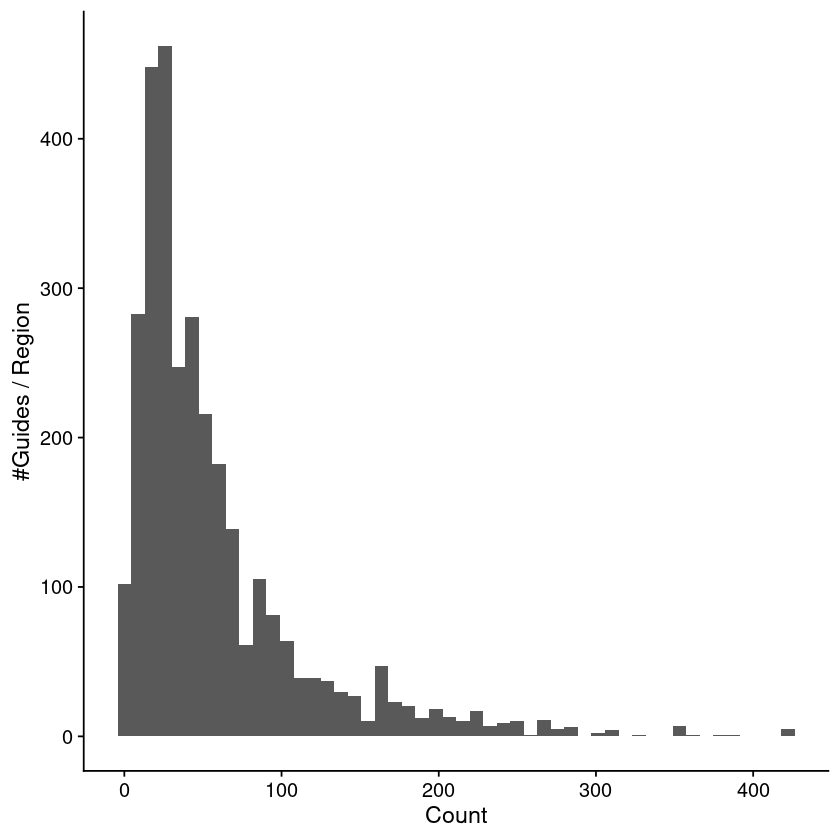

In [21]:
dat = dat_region_score_summary
gpt = ggplot(dat, aes(x=Count)) + 
    geom_histogram(bins = 50) + 
    labs(y="#Guides / Region") +
    theme_cowplot()
print(gpt)

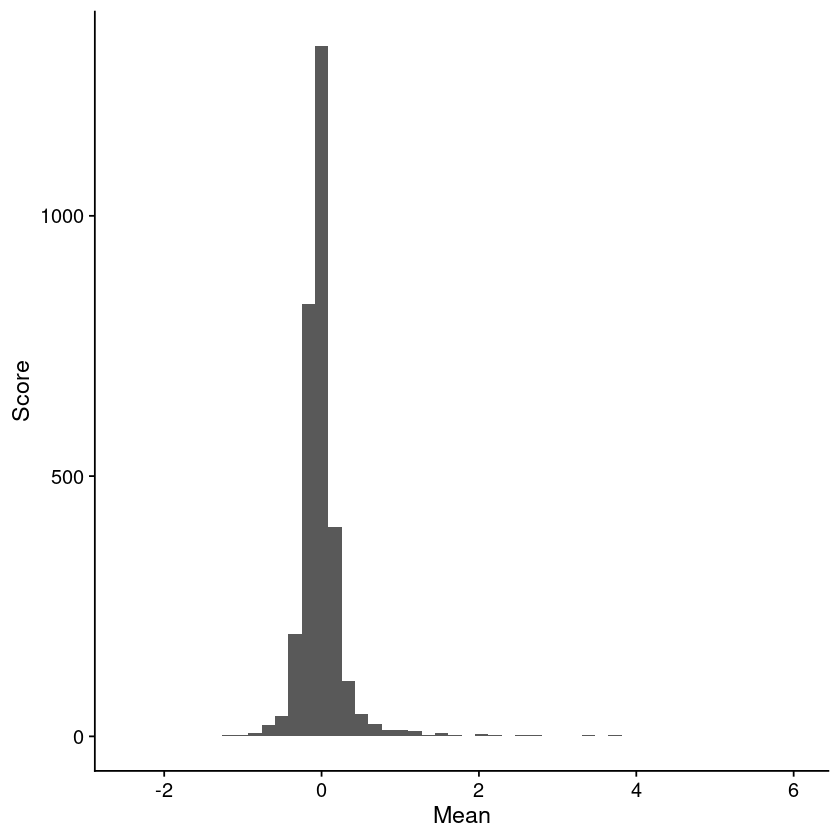

In [24]:
dat = dat_region_score_summary
gpt = ggplot(dat, aes(x=Mean)) + 
    geom_histogram(bins = 50) + 
    labs(y="Score") +
    theme_cowplot()
print(gpt)

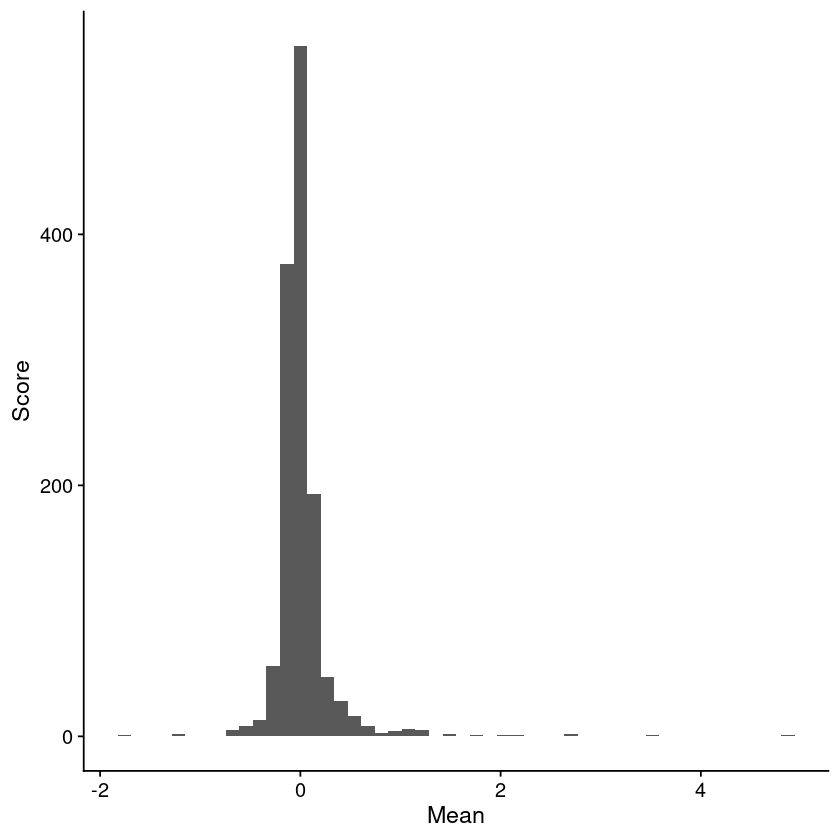

In [23]:
dat = dat_region_score_summary_merge
gpt = ggplot(dat, aes(x=Mean)) + 
    geom_histogram(bins = 50) + 
    labs(y="Score") +
    theme_cowplot()
print(gpt)

## Plot with Ranknorm

**STARR/MPRA Ranked score**

In [28]:
FD_RES_PRE = "/data/reddylab/Kuei/work/proj_encode_fcc/results_v4"

In [29]:
txt_fdiry = file.path(FD_RES_PRE, "comparison")
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

result.ranknorm.starrmpra.overlap.tsv 
result.score.starrmpra.tsv 


In [36]:
txt_fdiry = file.path(FD_RES_PRE, "comparison")
txt_fname = "result.ranknorm.starrmpra.overlap.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat = dat %>% dplyr::rename("Region" = "Peak")

dat_region_ranknorm_pre = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1241    6


Region,ASTARR,WSTARR,TMPRA,LMPRA,Mean
chr11:32870601-32871324,0.1200645,0.0620467,0.1958098,0.2280419,0.1514907
chr11:32874343-32875070,0.1305399,0.2143433,0.3231265,0.0809831,0.1872482
chr11:32884749-32885822,0.0854150,0.2634972,0.5439162,0.7856567,0.4196213


In [38]:
#txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
#vec = dir(txt_fdiry)
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_REGION = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [39]:
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc", 
        txt_region, 
        "summary"
    )
    txt_fname = "result.coverage.ranknorm.starrmpra.total.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 2460    8

$fcc_astarr_macs_input_union
[1] 3776    8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.5272279,0.7739837,0.5050813
chr11,4554256,4554817,chr11:4554256-4554817,ASTARR,0.1118192,0.6211382,0.8304878
chr11,4607720,4608631,chr11:4607720-4608631,ASTARR,0.7417945,0.8292683,0.6918699


In [40]:
lst = lst_dat_region_score_import
idx = "fcc_astarr_macs_input_union"
dat = lst[[idx]]

dat_region_ranknorm_new = dat
print(dim(dat))
head(dat, 3)

[1] 3776    8


Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr11,4539569,4540043,chr11:4539569-4540043,ASTARR,0.3923719,0.7288136,0.3961864
chr11,4551336,4552012,chr11:4551336-4552012,ASTARR,0.7410411,0.8336864,0.5770657
chr11,4553969,4555012,chr11:4553969-4555012,ASTARR,0.4063894,0.7394068,0.8138242


In [41]:
dat = dat_region_ranknorm_pre
dat = dat %>% 
    #dplyr::select(Chrom, ChromStart, ChromEnd, Region) %>% 
    dplyr::select(Region) %>% 
    dplyr::distinct()

###
dat_region = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 1241    1


Region
chr11:32870601-32871324
chr11:32874343-32875070
chr11:32884749-32885822
chr11:32901572-32902485
chr11:32903491-32904506
chr11:32910855-32912010


In [42]:
#dat = dat_region_score_starrmpra_import
dat = dat_region_ranknorm

dat = dat %>% 
    dplyr::select(Region, Mean) %>% 
    dplyr::distinct() %>%
    dplyr::arrange(Mean)
vec = dat$Region

### assign and show
VEC_TXT_REGION = vec
print(length(vec))

[1] 1241


In [43]:
dat_region_score_chcrff_import = dat_region_score_summary_merge

In [44]:
dat = dat_region_score_chcrff_import
dat = dat %>% dplyr::filter(Count >= 3)

dat = dat %>% 
    dplyr::select(Region, Mean_Pos, Mean_Neg) %>%
    dplyr::right_join(dat_region, by = "Region")

dat = dat %>% 
    tidyr::gather(Group, Score, -Region) %>%
    dplyr::select(Region, Group, Score) %>%
    dplyr::mutate(Region = factor(Region, levels=VEC_TXT_REGION)) %>%
    replace(is.na(.), 0)

dat_region_score_chcrff_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 2482    3


Region,Group,Score
chr11:33065336-33066228,Mean_Pos,0.0367548
chr11:33068519-33069100,Mean_Pos,0.0000000
chr11:33103533-33104120,Mean_Pos,1.4420960


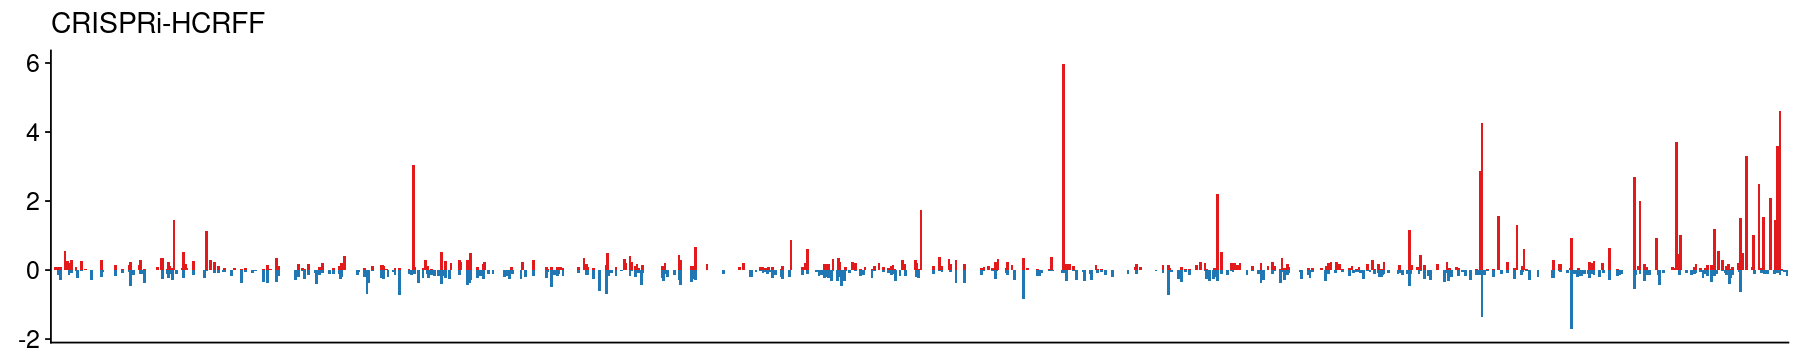

In [45]:
theme_fill = scale_fill_manual(
    values = c(
        "Mean_Pos"="#e31a1c", 
        "Mean_Neg"="#1f78b4")
)

theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "plain", size = 17)
    #axis.title.y = element_text(size = 15)
)

theme_legend = theme(legend.position = "none")

dat = dat_region_score_chcrff_arrange

gpt = ggplot(dat, aes(x=Region, y=Score, fill=Group)) + 
    geom_col(width=2, position="identity") + 
    labs(title = "CRISPRi-HCRFF") +
    theme_cowplot() + 
    theme_text +
    theme_fill +
    theme_legend

gpt_score_crispri_hcrff = gpt

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [46]:
dat = dat_region_ranknorm_new
dat = dat %>% 
    #dplyr::select(Chrom, ChromStart, ChromEnd, Region) %>% 
    dplyr::select(Region) %>% 
    dplyr::distinct()

###
dat_region = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 944   1


Region
chr11:4539569-4540043
chr11:4551336-4552012
chr11:4553969-4555012
chr11:4569016-4569992
chr11:4601808-4602487
chr11:4607676-4608647


In [49]:
#dat = dat_region_score_starrmpra_import
dat = dat_region_ranknorm_new

dat = dat %>% 
    dplyr::select(Region, Mean) %>% 
    dplyr::distinct() %>%
    dplyr::arrange(Mean)
vec = dat$Region

### assign and show
VEC_TXT_REGION = vec
print(length(vec))

[1] 944


In [50]:
dat_region_score_chcrff_import = dat_region_score_summary_merge

In [51]:
dat = dat_region_score_chcrff_import
dat = dat %>% dplyr::filter(Count >= 3)

dat = dat %>% 
    dplyr::select(Region, Mean_Pos, Mean_Neg) %>%
    dplyr::right_join(dat_region, by = "Region")

dat = dat %>% 
    tidyr::gather(Group, Score, -Region) %>%
    dplyr::select(Region, Group, Score) %>%
    dplyr::mutate(Region = factor(Region, levels=VEC_TXT_REGION)) %>%
    replace(is.na(.), 0)

dat_region_score_chcrff_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1888    3


Region,Group,Score
chr11:33065336-33066228,Mean_Pos,0.0367548
chr11:33068519-33069100,Mean_Pos,0.0000000
chr11:33103533-33104120,Mean_Pos,1.4420960


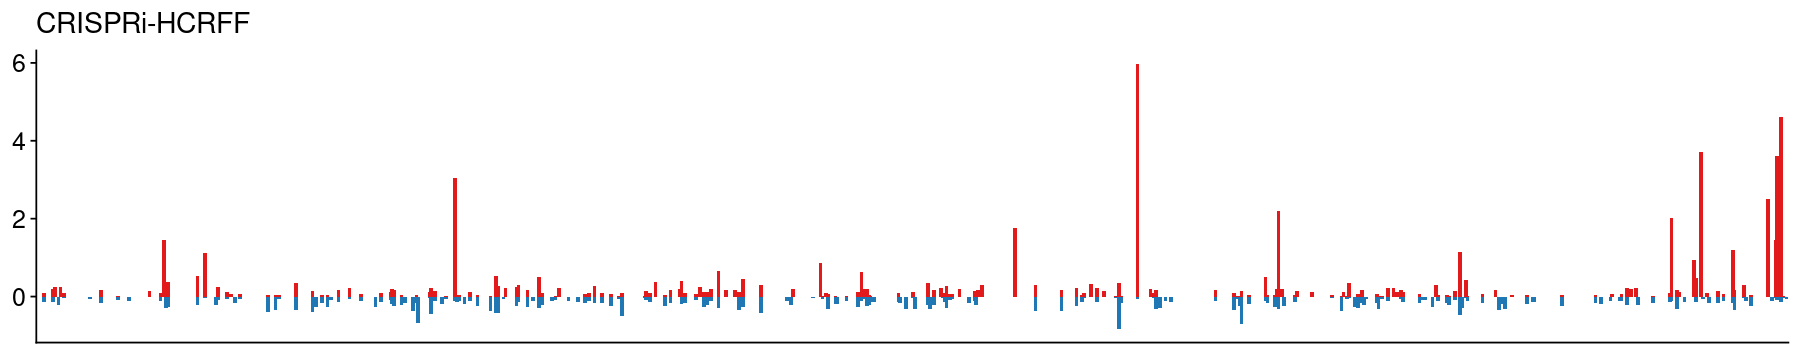

In [52]:
theme_fill = scale_fill_manual(
    values = c(
        "Mean_Pos"="#e31a1c", 
        "Mean_Neg"="#1f78b4")
)

theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "plain", size = 17)
    #axis.title.y = element_text(size = 15)
)

theme_legend = theme(legend.position = "none")

dat = dat_region_score_chcrff_arrange

gpt = ggplot(dat, aes(x=Region, y=Score, fill=Group)) + 
    geom_col(width=2, position="identity") + 
    labs(title = "CRISPRi-HCRFF") +
    theme_cowplot() + 
    theme_text +
    theme_fill +
    theme_legend

gpt_score_crispri_hcrff = gpt

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [ ]:


for (txt_region in VEC_TXT_REGION){
        
    ### show progress:
    cat("====================\n")
    cat("Region Folder:", txt_region, "\n")
    cat("Assay  Folder:", txt_assay,  "\n")
    cat("Import Files:\n")
    print(vec_txt_fname)
    cat("\n")
    flush.console()
    
    for (txt_fname_import in vec_txt_fname){
        
        ### set directory and import assay description
        txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "coverage", "summary")
        txt_fname = "description.tsv"
        txt_fpath = file.path(txt_fdiry, txt_fname)
        
        dat_cname_assay = read_tsv(txt_fpath, show_col_types = FALSE)

        ### set directory and import region description
        txt_folder = lst_txt_folder[[txt_region]]
        txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
        txt_fname  = "description.tsv"
        txt_fpath  = file.path(txt_fdiry, txt_fname)
        
        dat_cname_region = read_tsv(txt_fpath, show_col_types = FALSE)

        ### set column names/types for overlap score
        vec_txt_cname = c(
            paste(dat_cname_region$Name, "A", sep = "_"), 
            paste(dat_cname_assay$Name,  "B", sep = "_"), 
            "Overlap"
        )

        ### set directory and import region-assay overlap
        txt_folder = "overlap_score"
        txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region, txt_assay, txt_folder)
        txt_fname  = txt_fname_import
        txt_fpath  = file.path(txt_fdiry, txt_fname)

        dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)
        return

        

## Import region data

**Read region metadata table**

In [6]:
### set directory
txt_fdiry = file.path(FD_RES, "region", "summary")
txt_fname = "metadata.label.region_for_analysis.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_meta_region = dat
fun_display_table(dat)

Folder,FName,Label,FPath
region_for_analysis,K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.bed.gz,fcc_astarr_macs_input_overlap,/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region/region_for_analysis/K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.bed.gz
region_for_analysis,K562.hg38.ASTARR.macs.KS91.input.rep_all.union.q5.bed.gz,fcc_astarr_macs_input_union,/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region/region_for_analysis/K562.hg38.ASTARR.macs.KS91.input.rep_all.union.q5.bed.gz
region_for_analysis,K562.hg38.ENCSR000EKS.ENCFF274YGF.DNase.bed.gz,dnase_ENCFF274YGF,/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region/region_for_analysis/K562.hg38.ENCSR000EKS.ENCFF274YGF.DNase.bed.gz
region_for_analysis,K562.hg38.ENCSR000EOT.ENCFF185XRG.DNase.bed.gz,dnase_ENCFF185XRG,/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region/region_for_analysis/K562.hg38.ENCSR000EOT.ENCFF185XRG.DNase.bed.gz
region_for_analysis,K562.hg38.ENCSR483RKN.ENCFF558BLC.ATAC.bed.gz,atac_ENCFF558BLC,/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region/region_for_analysis/K562.hg38.ENCSR483RKN.ENCFF558BLC.ATAC.bed.gz
region_for_analysis,K562.hg38.ENCSR483RKN.ENCFF925CYR.ATAC.bed.gz,atac_ENCFF925CYR,/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region/region_for_analysis/K562.hg38.ENCSR483RKN.ENCFF925CYR.ATAC.bed.gz
region_for_analysis,K562.hg38.ENCSR868FGK.ENCFF333TAT.ATAC.bed.gz,atac_ENCFF333TAT,/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region/region_for_analysis/K562.hg38.ENCSR868FGK.ENCFF333TAT.ATAC.bed.gz
region_for_analysis,K562.hg38.ENCSR868FGK.ENCFF948AFM.ATAC.bed.gz,atac_ENCFF948AFM,/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region/region_for_analysis/K562.hg38.ENCSR868FGK.ENCFF948AFM.ATAC.bed.gz


**Create region list for looping**

In [7]:
dat = dat_meta_region
lst = split(dat$Folder, dat$Label)

lst_txt_folder = lst
print(lst)

$atac_ENCFF333TAT
[1] "region_for_analysis"

$atac_ENCFF558BLC
[1] "region_for_analysis"

$atac_ENCFF925CYR
[1] "region_for_analysis"

$atac_ENCFF948AFM
[1] "region_for_analysis"

$dnase_ENCFF185XRG
[1] "region_for_analysis"

$dnase_ENCFF274YGF
[1] "region_for_analysis"

$fcc_astarr_macs_input_overlap
[1] "region_for_analysis"

$fcc_astarr_macs_input_union
[1] "region_for_analysis"



## Helper functions

In [8]:
fun_get_absmax = function(x){ x[which.max(abs(x))] }

## CRISPRi-HCRFF

In [9]:
### init
txt_assay  = "CRISPRi_FlowFISH_K562_Riley_JinWoo"
vec_txt_fname    = c(
    "CRISPRi_HCRFF_K562.hg38.ZScore.filtered.unstranded.bed.gz",
    "CRISPRi_HCRFF_K562.hg38.ZScore.unstranded.bed.gz"
)

for (txt_region in VEC_TXT_REGION){
        
    ### show progress:
    cat("====================\n")
    cat("Region Folder:", txt_region, "\n")
    cat("Assay  Folder:", txt_assay,  "\n")
    cat("Import Files:\n")
    print(vec_txt_fname)
    cat("\n")
    flush.console()
    
    for (txt_fname_import in vec_txt_fname){
        
        ### set directory and import assay description
        txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "coverage", "summary")
        txt_fname = "description.tsv"
        txt_fpath = file.path(txt_fdiry, txt_fname)
        
        dat_cname_assay = read_tsv(txt_fpath, show_col_types = FALSE)

        ### set directory and import region description
        txt_folder = lst_txt_folder[[txt_region]]
        txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
        txt_fname  = "description.tsv"
        txt_fpath  = file.path(txt_fdiry, txt_fname)
        
        dat_cname_region = read_tsv(txt_fpath, show_col_types = FALSE)

        ### set column names/types for overlap score
        vec_txt_cname = c(
            paste(dat_cname_region$Name, "A", sep = "_"), 
            paste(dat_cname_assay$Name,  "B", sep = "_"), 
            "Overlap"
        )

        ### set directory and import region-assay overlap
        txt_folder = "overlap_score"
        txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region, txt_assay, txt_folder)
        txt_fname  = txt_fname_import
        txt_fpath  = file.path(txt_fdiry, txt_fname)

        dat_overlap_import = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)
        
        ### arrange overlapped scores
        dat = dat_overlap_import
        dat = dat %>% 
            dplyr::mutate(
                Chrom      = Chrom_A,
                ChromStart = ChromStart_A,
                ChromEnd   = ChromEnd_A,
                Region     = fun_gen_region(Chrom_A, ChromStart_A, ChromEnd_A),
                Score      = Score_B,
                Target     = Target_B,
                Sign       = ifelse(Score > 0, "pos", "neg")
            )
        dat_overlap_arrange = dat
        
        ### summarize scores for each region
        dat = dat_overlap_arrange
        dat = dat %>% 
            dplyr::group_by(Chrom, ChromStart, ChromEnd, Region) %>%
            dplyr::summarise(
                Mean    = mean(Score),
                Median  = median(Score),
                AbsMax  = fun_get_absmax(Score),
                Max     = max(Score),
                Min     = min(Score),
                Count   = n(),
                .groups = "drop"
            )
        dat_score_summary_total = dat

        ### summarize scores for each region + sign
        dat = dat_overlap_arrange
        dat = dat %>%
            dplyr::group_by(Region, Sign) %>%
            dplyr::summarise(Mean = mean(Score), .groups = "drop") %>%
            dplyr::mutate(Sign = dplyr::recode(Sign, `pos` = "Mean_Pos", `neg` = "Mean_Neg")) %>% 
            tidyr::spread(Sign, Mean) %>% 
            replace(is.na(.), 0)
        dat_score_summary_sign = dat

        ### summarize scores for each region + target
        dat = dat_overlap_arrange
        dat = dat %>%
            dplyr::group_by(Region, Target) %>%
            dplyr::summarise(Mean = mean(Score), .groups = "drop") %>%
            dplyr::mutate(Target = paste("Target", Target, sep = "_")) %>% 
            tidyr::spread(Target, Mean)
        dat_score_summary_target = dat

        ### combine score summaries
        dat = dat_score_summary_total %>%
            dplyr::left_join(
                dat_score_summary_sign,
                by = c("Region")
            ) %>%
            dplyr::left_join(
                dat_score_summary_target,
                by = c("Region")
            )
        dat_score_summary = dat
        
        ### set directory to save results
        if (str_detect(txt_fname_import, "filtered")){
            txt_fname = "result.coverage.score.filtered.tsv"
        } else {
            txt_fname = "result.coverage.score.tsv"
        }
        txt_folder = "overlap_score"
        txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region, txt_assay, txt_folder, "summary")
        txt_fpath  = file.path(txt_fdiry, txt_fname)
    
        ### export region scores
        txt_cmd = paste("mkdir -p", txt_fdiry)
        system(txt_cmd)
        dat = dat_score_summary
        dat = dat %>% dplyr::arrange(Chrom, ChromStart, ChromEnd)
        write_tsv(dat, txt_fpath)
        
        ### show progress:
        cat("Save File:\n")
        print(txt_fpath)
        cat("\n")
        flush.console()
    }
}

Region Folder: fcc_astarr_macs_input_overlap 
Assay  Folder: CRISPRi_FlowFISH_K562_Riley_JinWoo 
Import Files:
[1] "CRISPRi_HCRFF_K562.hg38.ZScore.filtered.unstranded.bed.gz"
[2] "CRISPRi_HCRFF_K562.hg38.ZScore.unstranded.bed.gz"         

Save File:
[1] "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc/fcc_astarr_macs_input_overlap/CRISPRi_FlowFISH_K562_Riley_JinWoo/overlap_score/summary/result.coverage.score.filtered.tsv"

Save File:
[1] "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc/fcc_astarr_macs_input_overlap/CRISPRi_FlowFISH_K562_Riley_JinWoo/overlap_score/summary/result.coverage.score.tsv"

Region Folder: fcc_astarr_macs_input_union 
Assay  Folder: CRISPRi_FlowFISH_K562_Riley_JinWoo 
Import Files:
[1] "CRISPRi_HCRFF_K562.hg38.ZScore.filtered.unstranded.bed.gz"
[2] "CRISPRi_HCRFF_K562.hg38.ZScore.unstranded.bed.gz"         

Save File:
[1] "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc/fcc_astarr_macs_input_union/